In [60]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/")


In [301]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
'''
Using beautiful soup to parse html of a url from web
Find the tables.
Since the tables don't have a specific class or id and the column -
    headers may vary I manualy found the index of the tables that -
    display auction information
Find the Table headers and place them in a list
'''
url = "https://en.wikipedia.org/wiki/List_of_2008_Indian_Premier_League_auctions_and_personnel_signings"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all("table")
headers = []
for th in table[2].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [63]:
'''
Create a pandas DataFrame using the table headers as columns
Place all the table rows from selected table in the parsed html in to the DataFrame
Remove any spacing or special characters 
Remove unnecessary columns
Change the Name of the columns to be same as other tables
Change the type of columns as needed
Convert the money as needed
Add Year column
'''
theTable08 = pd.DataFrame(columns = headers)
for tr in table[2].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip() for elem in rowData]
    length = len(theTable08)
    theTable08.loc[length] = row
theTable08 = theTable08.drop(theTable08.columns[[0, 1, 3, 4, 5]], axis = 1)
theTable08 = theTable08.rename(columns={"Name": "Player", "Auctioned Price(in US$ thousands)": "Amount"})
theTable08["Amount"] = pd.to_numeric(theTable08["Amount"])
theTable08['Amount'] = theTable08["Amount"].apply(lambda x: x*81525)
theTable08["Year"] = 2008

In [64]:
url = "https://en.wikipedia.org/wiki/List_of_2009_Indian_Premier_League_personnel_changes"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(page.status_code)

200


In [65]:
table = soup.find_all("table")
headers = []
for th in table[7].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [66]:
theTable09 = pd.DataFrame(columns = headers)
for tr in table[7].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip().replace('$','').replace(',','') for elem in rowData]
    length = len(theTable09)
    theTable09.loc[length] = row
theTable09 = theTable09.drop(theTable09.columns[[0, 4]], axis = 1)
theTable09 = theTable09.rename(columns={"Winning bid": "Amount"})
theTable09["Amount"] = pd.to_numeric(theTable09["Amount"])
theTable09['Amount'] = theTable09["Amount"].apply(lambda x: x*81.53)
theTable09["Year"] = 2009

In [67]:
url = "https://en.wikipedia.org/wiki/List_of_2010_Indian_Premier_League_personnel_changes"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(page.status_code)

200


In [68]:
table = soup.find_all("table")
headers = []
for th in table[0].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [69]:
theTable10 = pd.DataFrame(columns = headers)
for tr in table[0].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip().replace('$','').replace(',','') for elem in rowData]
    length = len(theTable10)
    theTable10.loc[length] = row
theTable10 = theTable10.drop(theTable10.columns[[3]], axis = 1)
theTable10 = theTable10.rename(columns={"Franchise": "Team", "Sold price (USD)": "Amount"})
theTable10["Amount"] = pd.to_numeric(theTable10["Amount"])
theTable10['Amount'] = theTable10["Amount"].apply(lambda x: x*81.53)
theTable10["Year"] = 2010

In [70]:
url = "https://en.wikipedia.org/wiki/List_of_2011_Indian_Premier_League_personnel_changes"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(page.status_code)

200


In [71]:
table = soup.find_all("table")
headers = []
for th in table[2].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [72]:
theTable11 = pd.DataFrame(columns = headers)
for tr in table[2].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip().replace('$','').replace(',','') for elem in rowData]
    length = len(theTable11)
    theTable11.loc[length] = row
theTable11 = theTable11.drop(theTable11.columns[[0, 4]], axis = 1)
theTable11 = theTable11.rename(columns={"Winning bid": "Amount"})
theTable11["Amount"] = pd.to_numeric(theTable11["Amount"])
theTable11['Amount'] = theTable11["Amount"].apply(lambda x: x*81.53)
theTable11["Year"] = 2011

In [73]:
url = "https://en.wikipedia.org/wiki/List_of_2012_Indian_Premier_League_personnel_changes"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(page.status_code)

200


In [74]:
table = soup.find_all("table")
headers = []
for th in table[9].find_all('th'):
    title = th.text.strip()
    headers.append(title)

In [75]:
theTable12 = pd.DataFrame(columns = headers)
for tr in table[9].find_all('tr')[1:]:
    rowData = tr.find_all('td')
    row = [elem.text.strip().replace('$','').replace(',','') for elem in rowData]
    length = len(theTable12)
    theTable12.loc[length] = row
theTable12 = theTable12.drop(theTable12.columns[[0, 3]], axis = 1)
theTable12 = theTable12.rename(columns={"Winning bid": "Amount"})
theTable12["Amount"] = pd.to_numeric(theTable12["Amount"])
theTable12['Amount'] = theTable12["Amount"].apply(lambda x: x*81.53)
theTable12["Year"] = 2012

In [567]:
'''
Combine all the DataFrames from 2008 to 2012
Read in csv to DataFrames
Remove unnecessary columns
Combine DataFrames to include data from 2008 to 2022
Write to a new csv file
'''
theTable08To12 = pd.concat([theTable08, theTable09, theTable10, theTable11, theTable12])
theTable13_22 = pd.read_csv ('/Users/sepehr/Documents/ECE143/Final/IPLPlayerAuctionData13-22.csv')
theTable13_22 = theTable13_22.drop(theTable13_22.columns[[1, 5]], axis = 1)
theTable = pd.concat([theTable08To12, theTable13_22])
theTable["Amount"] = pd.to_numeric(theTable["Amount"])
theTable['Amount'] = theTable["Amount"].apply(lambda x: x//81.53).round(-3)
theTable.loc[theTable['Team'] == 'Pune Warriors India', 'Team'] = 'Pune Warriors'
theTable.loc[theTable['Team'] == 'Delhi Capitals', 'Team'] = 'Delhi Daredevils'
theTable.loc[theTable['Team'] == 'Rising Pune Supergiant', 'Team'] = 'Rising Pune Supergiants'
thePath = os.getcwd() + '/data/IPL Player Auction 08-22.csv'
theTable.to_csv(thePath, index=False)

In [92]:
matches = pd.read_csv ('data/matches.csv')
matches = matches.drop(matches.columns[[0, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]], axis = 1)
matches = matches.rename(columns={"season": "Year", "winner": "Winner", "player_of_match": "MVP", "team1": "Team1", "team2": "Team2"})

In [216]:
valA1 = []
for year in range(8, 17):
    amountsYr = theTable[(theTable['Year'] == (2000+year)) & (theTable['Team'] == "Kings XI Punjab")]['Amount'].tolist()
    valA1.append(sum(amountsYr)/len(amountsYr))
valA2 = []
for year in range(8,17):
    gamesYr = matches[(matches['Year'] == (2000+year)) & ((matches['Team1'] == "Kings XI Punjab") | (matches['Team2'] == "Kings XI Punjab"))]["Winner"].tolist()
    occuranceYr = gamesYr.count("Kings XI Punjab")
    valA2.append((occuranceYr/(len(gamesYr) - occuranceYr)))
valA3 = []
for i in range(len(valA1)):
    valA3.append(valA1[i]/(1/valA2[i]))


In [432]:
years = []
for elem in range(len(matches["Year"].unique().tolist())):
    years.append(matches["Year"].unique()[elem].astype(str))

In [319]:
# matWL = matches["Team1"].unique()
# newDF = pd.DataFrame(columns = [matches["Year"].unique()], index = [matches["Team1"].unique()])
totalBidYr = []

for elem in matches["Team1"].unique():
    yearbid = []
    for year in range(8,17):
        yearbid.append(sum(theTable[(theTable['Year'] == (2000+year)) & (theTable['Team'] == elem)]['Amount'].tolist()))
    totalBidYr.append(yearbid)

In [404]:
totalWLYr = []

for elem in matches["Team1"].unique():
    winLossYr = []
    for year in range(8,17):
        gamesYr=matches[(matches['Year'] == (2000+year)) & ((matches['Team1'] == elem) | (matches['Team2'] == elem))]["Winner"].tolist()
        occuranceYr = gamesYr.count(elem)
        if len(gamesYr) > 0:
            winLossYr.append((occuranceYr/(len(gamesYr) - occuranceYr)))
        else:
            winLossYr.append(np.nan) #np.nan or -1
    totalWLYr.append(winLossYr)

In [320]:
totalBidMat17 = np.array([np.array(xi) for xi in totalBidYr])#sum of bids per year for each team until 2017
totalBidMat16 = np.array([np.array(xi) for xi in totalBidYr])#sum of bids per year for each team until 2016
totalWLMat = np.array([np.array(xi) for xi in totalWLYr])#Win Loss ration for each team per year until 2016

In [433]:
totalBidPerYear17 = pd.DataFrame(totalBidMat17, columns = [np.append(matches["Year"].unique(), 2017)], index = [matches["Team1"].unique()])#dataframe of sum of bids until 2017
totalBidPerYear16 = pd.DataFrame(totalBidMat16, columns = years, index = [matches["Team1"].unique()])
#dataframe of sum of bids until 2016
winLossPerYear = pd.DataFrame(totalWLMat, columns = years, index = [matches["Team1"].unique()])
#dataframe win loss ratio until 2016

In [564]:
thePath = os.getcwd() + '/data/auctionSpending.csv'
totalBidPerYear16.to_csv(thePath, index=True)
thePath = os.getcwd() + '/data/IwinLossRatio.csv'
winLossPerYear.to_csv(thePath, index=True)

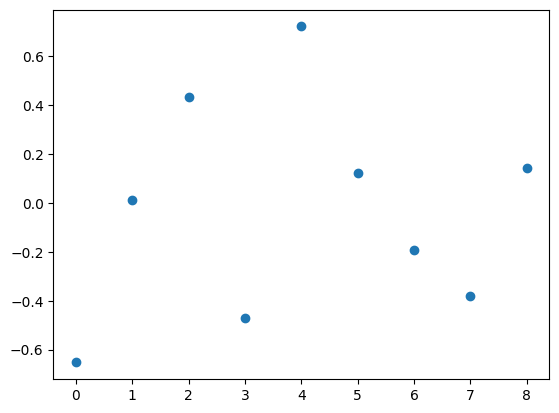

In [437]:
plt.plot((winLossPerYear.corrwith(totalBidPerYear16, axis=0).to_numpy()), 'o')


In [409]:
winLossPerYear.corrwith(totalBidPerYear16, axis=0)

2008   -0.652631
2009    0.013018
2010    0.433064
2011   -0.470188
2012    0.721209
2013    0.120481
2014   -0.191300
2015   -0.380805
2016    0.144306
dtype: float64

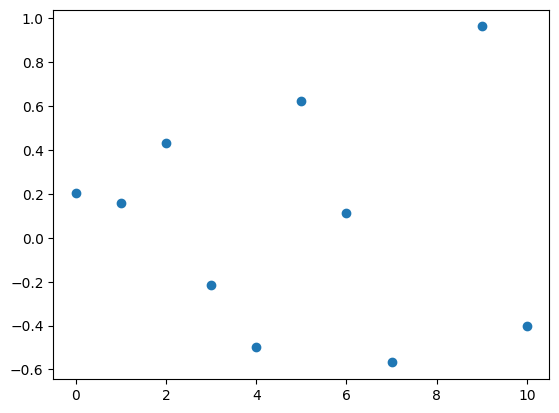

In [438]:
plt.plot((winLossPerYear.corrwith(totalBidPerYear16, axis=1).to_numpy()), 'o')


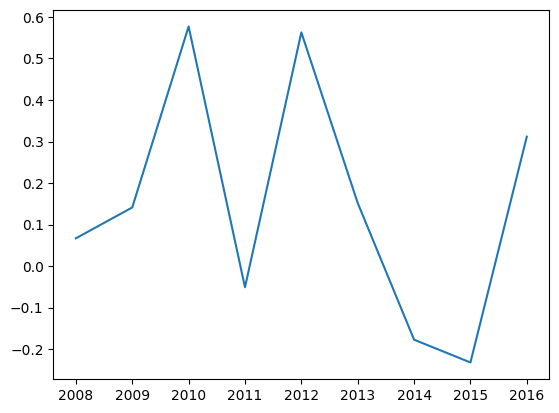

In [397]:
plt.plot(matches["Year"].unique(), winLossPerYear.corrwith(totalBidPerYear16, axis=0).to_numpy())

In [384]:
bidMat = totalBidPerYear16.to_numpy()
wlMat = winLossPerYear.to_numpy()

In [385]:
bidMat = (bidMat - bidMat.mean(axis=0))/bidMat.std(axis=0)
wlMat = (wlMat - wlMat.mean(axis=0))/wlMat.std(axis=0)
correlation = (np.dot(wlMat.T, bidMat)/wlMat.shape[0])[0]
# np.corrcoef(np.hstack((A,B)),rowvar=False)[0,1:]

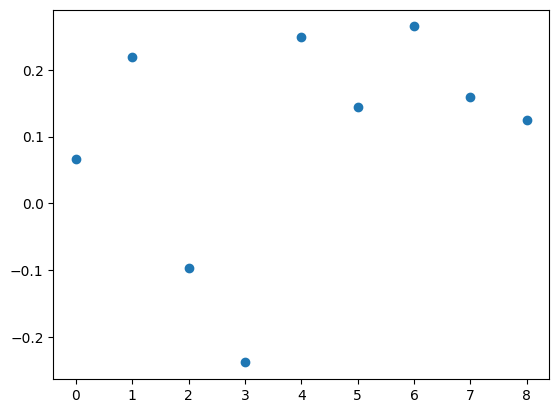

In [392]:
plt.plot(correlation, 'o')

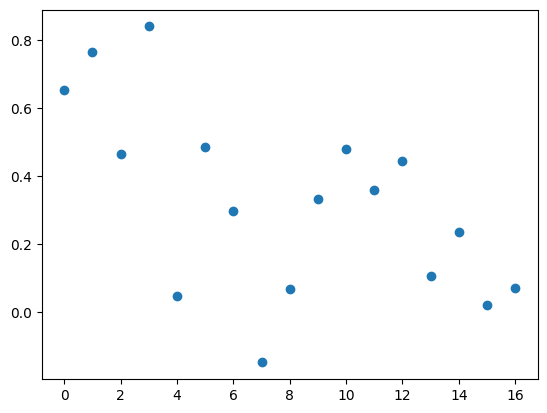

In [391]:
plt.plot(np.corrcoef(np.hstack((bidMat,wlMat)),rowvar=False)[0,1:], 'o')

In [474]:
allTeamWLRatio = []
for i in range(len(years)):
    allTeamWLRatio.append(sum(winLossPerYear[winLossPerYear[years[i]].notna()][years[i]].to_numpy())/winLossPerYear.count()[i])
allTeamWLRatio

[1.3803571428571428,
 1.0858630952380952,
 1.0794642857142858,
 1.0833333333333335,
 1.1408449575116242,
 1.1796092796092799,
 1.2017361111111111,
 1.0112734487734487,
 1.0628968253968254]

In [562]:
allTeamBidYear = []
for i in range(len(years)):
    allTeamBidYear.append(sum(totalBidPerYear16[years[i]].to_numpy())/len(matches["Team1"].unique())

allTeamBidYear

[2804230.769230769,
 588461.5384615385,
 280769.23076923075,
 4828846.153846154,
 845769.2307692308,
 840923.0769230769,
 2477538.4615384615,
 826230.7692307692,
 1282846.1538461538]

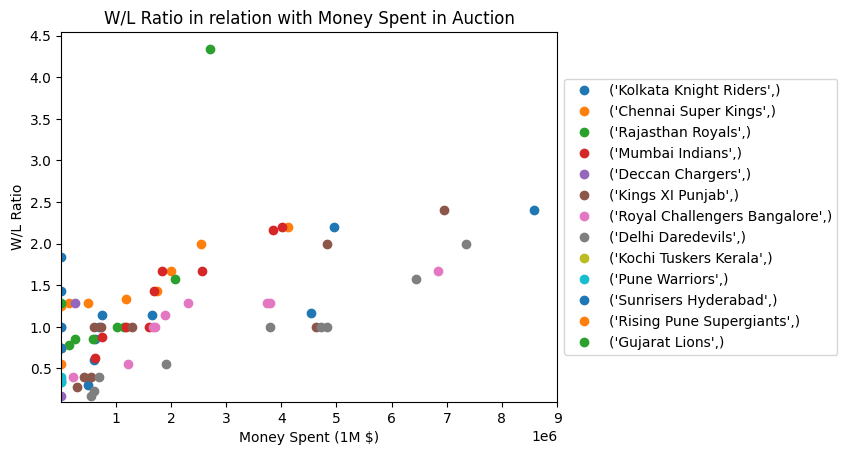

In [570]:
for ind, elem in enumerate(list(totalBidPerYear16.index.values)):
    plt.plot(totalBidPerYear16[years[:]].iloc[ind].sort_values(ascending=True), winLossPerYear[years[:]].iloc[ind].sort_values(ascending=True), 'o', label = elem)
    #spending to win/ratio
xleft, xright = plt.xlim()
yleft, yright = plt.ylim()
plt.xlim([10000, xright])
plt.ylim([0.1, yright])
plt.xlabel('Money Spent (1M $)')
plt.ylabel('W/L Ratio')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("W/L Ratio in relation with Money Spent in Auction")
plt.savefig('win_loss ratio vs Speding.png')

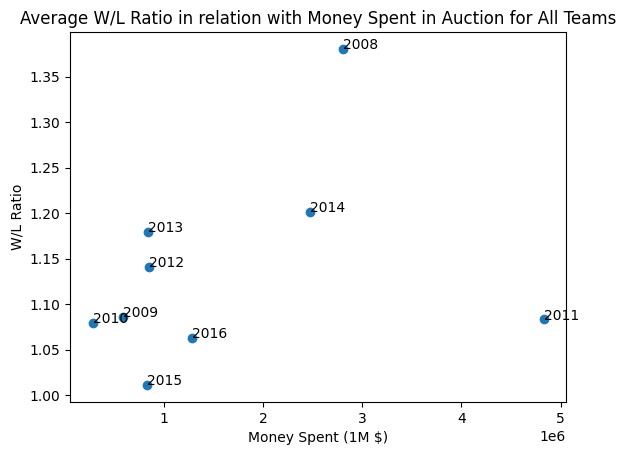

In [571]:
# plt.plot(allTeamBidYear,allTeamWLRatio, '-')#spending to win/ratio

fig, ax = plt.subplots()
ax.scatter(allTeamBidYear, allTeamWLRatio)
for i, txt in enumerate(years):
    ax.annotate(txt, (allTeamBidYear[i], allTeamWLRatio[i]))
plt.xlabel('Money Spent (1M $)')
plt.ylabel('W/L Ratio')
plt.title("Average W/L Ratio in relation with Money Spent in Auction for All Teams")
plt.savefig('win_loss ratio vs speding average.png')